We begin by conducting sentiment analysis using a dictionary.

In [294]:
import pandas as pd
import numpy as np

In [295]:
df = pd.read_csv('df_cleaned_X_train.csv')
df_test  = pd.read_csv('df_cleaned_X_test.csv')

df_train = pd.read_csv('df_cleaned_y_train.csv')
df_test_y = pd.read_csv('df_cleaned_y_test.csv')

In [296]:
df

,id,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week,timedelta,timedelta_numeric,timedelta_minmax
0,135871,2014-12-14 01:11:50.638,2016-04-02 16:31:58.139,548ce28d6536610018050000,NaN,He Dissed A Rape Victim On National TV And Now...,<p>Anytime there's a new sexual assault case b...,he-dissed-a-rape-victim-on-national-tv-and-now...,548c6a30333034001b240000,3013,39,100.0,True,False,NaN,NaN,201450,475 days 15:20:07.501000,4.109521e+07,0.193770
1,148756,2014-11-09 19:50:25.589,2016-04-02 16:31:36.967,545fc565dba561926a00000f,Things that matter. Pass 'em on.,You Might Call Jacob A Man With Lipstick. Well...,<p>Meet Jacob. You might have met a person lik...,you-might-call-jacob-a-man-with-lipstick-well-...,545dd264f1cb1f440b00001d,3103,62,24.8,False,False,NaN,NaN,201445,509 days 20:41:11.378000,4.405207e+07,0.242162
2,38486,2014-03-24 02:19:28.068,2016-04-02 16:26:23.861,532f93deca310662e3000001,Things that matter. Pass 'em on. #PromotedPost,I Wouldn't Eat That If I Were You... It's Not ...,<p>Is anyone else as excited as I am for the n...,i-wouldnt-eat-that-if-i-were-you-its-not-poiso...,5332ba0d1fae79f09f002be6,2233,40,89.0,False,False,NaN,TakePartChavez20-19a6cac618ec3d3bf0f340ae6eb3d...,201412,740 days 14:06:55.793000,6.398682e+07,0.568413
3,147221,2014-10-20 00:19:19.265,2016-04-02 16:31:12.466,54445507ecd9a245d8000005,Things that matter. Pass 'em on.,"Despite What Happened At The End Of 'Titanic,'...",<p>You can see Leo really cares about what's h...,despite-what-happened-at-the-end-of-titanic-le...,5443f2398996644f84000015,3162,11,0.1,False,False,NaN,NaN,201442,530 days 16:11:53.201000,4.585031e+07,0.271592
4,86092,2014-02-27 00:32:44.843,2016-04-02 16:29:00.646,530e86e775e6a740a500004f,The drawings are bonus.,Economist Takes 2 Minutes And A Whiteboard To ...,<p>I don't think rich people are generally mal...,economist-takes-2-minutes-and-a-whiteboard-to-...,5332b6591fae79f09f000d6e,3670,86,100.0,True,False,NaN,benefits-e403880bf5ddc759e67826b8284a9846.png,201408,765 days 15:56:15.803000,6.615338e+07,0.603870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62799,14059,2015-03-27 16:57:13.191,2016-04-02 16:24:54.695,55158be9616664002c100000,It was completely unexpected.,A scientist watched a bunch of male baboons di...,<p>The baboons show up halfway through. Just g...,a-scientist-watched-a-bunch-of-male-baboons-di...,5514afe3303261001c4d0000,2118,80,85.4,False,False,He didn't see it coming *at all.*,NaN,201512,371 days 23:27:41.504000,3.213886e+07,0.047192
62800,129829,2014-11-02 17:38:46.671,2016-04-02 16:31:30.048,5456566ab2bd23dced000009,Things that matter. Pass 'em on.,How To Make The Most Awkward Kid Conversation ...,"<p>Whether you're a parent or not, protecting ...",how-to-make-the-most-awkward-kid-conversation-...,545662b209e1045b59000015,3871,15,0.0,False,False,NaN,NaN,201444,516 days 22:52:43.377000,4.466476e+07,0.252189
62801,133246,2014-11-25 20:44:40.537,2016-04-02 16:31:46.470,5474e8ae32376400120c0000,What dating a woman with an eating disorder is...,A Beautiful And Real Response To A Disgusting ...,"<p><strong style=""background-color: initial;"">...",a-beautiful-and-real-response-to-a-disgusting-...,5474b5541631de66cc00004a,2985,51,8.1,False,False,It's time we all heard the truth.,NaN,201447,493 days 19:47:05.933000,4.266643e+07,0.219485
62802,1803,2015-01-08 03:56:53.527,2016-04-02 16:32:06.924,54adffc76331630012440000,Humans. We're an odd species.,The Bizarre Human Tendency That Drew Us To Her...,<p>Humans. We're an odd species.<span></span><...,the-bizarre-human-tendency-that-drew-us-to-her...,54ab1fa962336500152a0000,2870,48,32.0,False,False,"In 1987, the world was captivated by one littl...",NaN,201501,450 days 12:35:13.397000,3.892531e+07,0.158258


In [297]:
df.describe()

,id,impressions,clicks,significance,test_week,timedelta_numeric,timedelta_minmax
count,62804.000000,62804.000000,62804.000000,62804.000000,62804.000000,6.280400e+04,62804.000000
mean,77500.471355,3596.146042,53.287498,41.010356,201423.116107,5.552603e+07,0.429944
std,44200.160258,1461.289965,45.689207,39.884687,53.306474,1.590361e+07,0.260277
min,11.000000,1.000000,0.000000,0.000000,201320.000000,2.925533e+07,0.000000
25%,36621.250000,2769.000000,23.000000,2.600000,201406.000000,4.380097e+07,0.238053
50%,79026.000000,3141.000000,41.000000,25.800000,201432.000000,5.155567e+07,0.364966
75%,116134.250000,4113.000000,68.000000,87.100000,201445.000000,6.717402e+07,0.620574
max,150814.000000,36908.000000,822.000000,100.000000,201517.000000,9.035791e+07,1.000000


In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62804 entries, 0 to 62803
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    62804 non-null  int64  
 1   created_at            62804 non-null  object 
 2   updated_at            62804 non-null  object 
 3   clickability_test_id  62804 non-null  object 
 4   excerpt               56308 non-null  object 
 5   headline              62803 non-null  object 
 6   lede                  62748 non-null  object 
 7   slug                  62804 non-null  object 
 8   eyecatcher_id         62668 non-null  object 
 9   impressions           62804 non-null  int64  
 10  clicks                62804 non-null  int64  
 11  significance          62804 non-null  float64
 12  first_place           62804 non-null  bool   
 13  winner                62804 non-null  bool   
 14  share_text            10937 non-null  object 
 15  square             

Checking through the data, we see that everything appears to be in order.

We continue by preprocessing all headlines, converting them into lower case.

In [299]:
df['headline'] = df['headline'].astype(str)
df_test['headline'] = df['headline'].astype(str)

In [300]:
df['headline'] = df['headline'].str.lower()
df_test['headline'] = df_test['headline'].str.lower()

We continue by preforming contractions on all headlines, removing all non alphanumeric characters and tokenizing the text in the headline.

Reference: https://medium.com/analytics-vidhya/sentiment-analysis-on-amazon-reviews-using-tf-idf-approach-c5ab4c36e7a1

In [301]:
import re
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/gohjunwei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

We begin by calculating the text complexity, similar to how we did so in our analysis leveraging VADER.

In [302]:
df['length'] = df['headline'].apply(lambda x: len(x))
df_test['length'] = df_test['headline'].apply(lambda x: len(x))

max_length = max(df['length'])
min_length = min(df['length'])

max_length_test = max(df_test['length'])
min_length_test = min(df_test['length'])

df['length_minmax'] = (df['length'] - min_length) / (max_length - min_length)
df_test['length_minmax'] = (df_test['length'] - min_length_test) / (max_length_test - min_length_test)

import textstat

df['flesch_reading'] = df['headline'].apply(lambda x: textstat.flesch_reading_ease(x))
df['flesch_kincaid'] = df['headline'].apply(lambda x: textstat.textstat.flesch_kincaid_grade(x))
df['gunning_fog'] = df['headline'].apply(lambda x: textstat.gunning_fog(x))
df['length'] = df['headline'].apply(lambda x: len(x))

df_test['flesch_reading'] = df_test['headline'].apply(lambda x: textstat.flesch_reading_ease(x))
df_test['flesch_kincaid'] = df_test['headline'].apply(lambda x: textstat.textstat.flesch_kincaid_grade(x))
df_test['gunning_fog'] = df_test['headline'].apply(lambda x: textstat.gunning_fog(x))
df_test['length'] = df_test['headline'].apply(lambda x: len(x))

In [303]:
def contractions(s):
    s = re.sub(r"won't", "will not", s)
    s = re.sub(r"wouldn't", "would not", s)
    s = re.sub(r"couldn't", "could not", s)
    s = re.sub(r"'d", " would", s)
    s = re.sub(r"can't", "can not", s)
    s = re.sub(r"n't", " not", s)
    s = re.sub(r"'re", " are", s)
    s = re.sub(r"'s", " is", s)
    s = re.sub(r"'ll", " will", s)
    s = re.sub(r"'t", " not", s)
    s = re.sub(r"'ve", " have", s)
    s = re.sub(r"'m", " am", s)
    return s

In [304]:
df

,id,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,...,square,test_week,timedelta,timedelta_numeric,timedelta_minmax,length,length_minmax,flesch_reading,flesch_kincaid,gunning_fog
0,135871,2014-12-14 01:11:50.638,2016-04-02 16:31:58.139,548ce28d6536610018050000,NaN,he dissed a rape victim on national tv and now...,<p>Anytime there's a new sexual assault case b...,he-dissed-a-rape-victim-on-national-tv-and-now...,548c6a30333034001b240000,3013,...,NaN,201450,475 days 15:20:07.501000,4.109521e+07,0.193770,79,0.554745,88.06,5.2,9.15
1,148756,2014-11-09 19:50:25.589,2016-04-02 16:31:36.967,545fc565dba561926a00000f,Things that matter. Pass 'em on.,you might call jacob a man with lipstick. well...,<p>Meet Jacob. You might have met a person lik...,you-might-call-jacob-a-man-with-lipstick-well-...,545dd264f1cb1f440b00001d,3103,...,NaN,201445,509 days 20:41:11.378000,4.405207e+07,0.242162,89,0.627737,79.60,6.4,6.80
2,38486,2014-03-24 02:19:28.068,2016-04-02 16:26:23.861,532f93deca310662e3000001,Things that matter. Pass 'em on. #PromotedPost,i wouldn't eat that if i were you... it's not ...,<p>Is anyone else as excited as I am for the n...,i-wouldnt-eat-that-if-i-were-you-its-not-poiso...,5332ba0d1fae79f09f002be6,2233,...,TakePartChavez20-19a6cac618ec3d3bf0f340ae6eb3d...,201412,740 days 14:06:55.793000,6.398682e+07,0.568413,78,0.547445,90.09,4.4,6.00
3,147221,2014-10-20 00:19:19.265,2016-04-02 16:31:12.466,54445507ecd9a245d8000005,Things that matter. Pass 'em on.,"despite what happened at the end of 'titanic,'...",<p>You can see Leo really cares about what's h...,despite-what-happened-at-the-end-of-titanic-le...,5443f2398996644f84000015,3162,...,NaN,201442,530 days 16:11:53.201000,4.585031e+07,0.271592,100,0.708029,71.14,7.6,9.15
4,86092,2014-02-27 00:32:44.843,2016-04-02 16:29:00.646,530e86e775e6a740a500004f,The drawings are bonus.,economist takes 2 minutes and a whiteboard to ...,<p>I don't think rich people are generally mal...,economist-takes-2-minutes-and-a-whiteboard-to-...,5332b6591fae79f09f000d6e,3670,...,benefits-e403880bf5ddc759e67826b8284a9846.png,201408,765 days 15:56:15.803000,6.615338e+07,0.603870,99,0.700730,71.14,7.6,9.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62799,14059,2015-03-27 16:57:13.191,2016-04-02 16:24:54.695,55158be9616664002c100000,It was completely unexpected.,a scientist watched a bunch of male baboons di...,<p>The baboons show up halfway through. Just g...,a-scientist-watched-a-bunch-of-male-baboons-di...,5514afe3303261001c4d0000,2118,...,NaN,201512,371 days 23:27:41.504000,3.213886e+07,0.047192,93,0.656934,64.71,8.0,11.33
62800,129829,2014-11-02 17:38:46.671,2016-04-02 16:31:30.048,5456566ab2bd23dced000009,Things that matter. Pass 'em on.,how to make the most awkward kid conversation ...,"<p>Whether you're a parent or not, protecting ...",how-to-make-the-most-awkward-kid-conversation-...,545662b209e1045b59000015,3871,...,NaN,201444,516 days 22:52:43.377000,4.466476e+07,0.252189,58,0.401460,69.79,6.0,8.00
62801,133246,2014-11-25 20:44:40.537,2016-04-02 16:31:46.470,5474e8ae32376400120c0000,What dating a woman with an eating disorder is...,a beautiful and real response to a disgusting ...,"<p><strong style=""background-color: initial;"">...",a-beautiful-and-real-response-to-a-disgusting-...,5474b5541631de66cc00004a,2985,...,NaN,201447,493 days 19:47:05.933000,4.266643e+07,0.219485,77,0.540146,41.36,10.7,11.35
62802,1803,2015-01-08 03:56:53.527,2016-04-02 16:32:06.924,54adffc76331630012440000,Humans. We're an odd species.,the bizarre human tendency that drew us to her...,<p>Humans. We're an odd species.<span></span><...,the-bizarre-human-tendency-that-drew-us-to-her...,54ab1fa962336500152a0000,2870,...,NaN,201501,450 days 12:35:13.397000,3.892531e+07,0.158258,95,0.671533,55.24,9.5,13.90


Here, we convert all contractions

In [305]:
df['headline'] = df['headline'].apply(lambda x: contractions(x))
df_test['headline'] = df_test['headline'].apply(lambda x: contractions(x))

We continue by removing all non alphanumeric characters

In [306]:
df['headline']=df['headline'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))

df_test['headline']=df_test['headline'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))

Now, we remove all extra spaces.

In [307]:
df['headline'] = df['headline'].apply(lambda x: re.sub(' +', ' ', x))
df_test['headline'] = df_test['headline'].apply(lambda x: re.sub(' +', ' ', x))

We now remove all stop words. These are words such as the, a, etc that do not add meaning to a sentence.

In [308]:
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english') #stop is a dictionary

df['headline'] = df['headline'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))
df_test['headline'] = df_test['headline'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gohjunwei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We proceed by lemmatizing the words. We can see that this converts words to their base or root form.

In [309]:
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df['headline'] = df['headline'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))
df_test['headline'] = df_test['headline'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gohjunwei/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [310]:
df

,id,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,...,square,test_week,timedelta,timedelta_numeric,timedelta_minmax,length,length_minmax,flesch_reading,flesch_kincaid,gunning_fog
0,135871,2014-12-14 01:11:50.638,2016-04-02 16:31:58.139,548ce28d6536610018050000,NaN,dissed rape victim national tv need shut entir...,<p>Anytime there's a new sexual assault case b...,he-dissed-a-rape-victim-on-national-tv-and-now...,548c6a30333034001b240000,3013,...,NaN,201450,475 days 15:20:07.501000,4.109521e+07,0.193770,79,0.554745,88.06,5.2,9.15
1,148756,2014-11-09 19:50:25.589,2016-04-02 16:31:36.967,545fc565dba561926a00000f,Things that matter. Pass 'em on.,might call jacob man lipstick well jacob man h...,<p>Meet Jacob. You might have met a person lik...,you-might-call-jacob-a-man-with-lipstick-well-...,545dd264f1cb1f440b00001d,3103,...,NaN,201445,509 days 20:41:11.378000,4.405207e+07,0.242162,89,0.627737,79.60,6.4,6.80
2,38486,2014-03-24 02:19:28.068,2016-04-02 16:26:23.861,532f93deca310662e3000001,Things that matter. Pass 'em on. #PromotedPost,would eat poison anything,<p>Is anyone else as excited as I am for the n...,i-wouldnt-eat-that-if-i-were-you-its-not-poiso...,5332ba0d1fae79f09f002be6,2233,...,TakePartChavez20-19a6cac618ec3d3bf0f340ae6eb3d...,201412,740 days 14:06:55.793000,6.398682e+07,0.568413,78,0.547445,90.09,4.4,6.00
3,147221,2014-10-20 00:19:19.265,2016-04-02 16:31:12.466,54445507ecd9a245d8000005,Things that matter. Pass 'em on.,despite happened end notitanic leonardo dicapr...,<p>You can see Leo really cares about what's h...,despite-what-happened-at-the-end-of-titanic-le...,5443f2398996644f84000015,3162,...,NaN,201442,530 days 16:11:53.201000,4.585031e+07,0.271592,100,0.708029,71.14,7.6,9.15
4,86092,2014-02-27 00:32:44.843,2016-04-02 16:29:00.646,530e86e775e6a740a500004f,The drawings are bonus.,economist take minute whiteboard explain shift...,<p>I don't think rich people are generally mal...,economist-takes-2-minutes-and-a-whiteboard-to-...,5332b6591fae79f09f000d6e,3670,...,benefits-e403880bf5ddc759e67826b8284a9846.png,201408,765 days 15:56:15.803000,6.615338e+07,0.603870,99,0.700730,71.14,7.6,9.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62799,14059,2015-03-27 16:57:13.191,2016-04-02 16:24:54.695,55158be9616664002c100000,It was completely unexpected.,scientist watched bunch male baboon die reveal...,<p>The baboons show up halfway through. Just g...,a-scientist-watched-a-bunch-of-male-baboons-di...,5514afe3303261001c4d0000,2118,...,NaN,201512,371 days 23:27:41.504000,3.213886e+07,0.047192,93,0.656934,64.71,8.0,11.33
62800,129829,2014-11-02 17:38:46.671,2016-04-02 16:31:30.048,5456566ab2bd23dced000009,Things that matter. Pass 'em on.,make awkward kid conversation le awkward,"<p>Whether you're a parent or not, protecting ...",how-to-make-the-most-awkward-kid-conversation-...,545662b209e1045b59000015,3871,...,NaN,201444,516 days 22:52:43.377000,4.466476e+07,0.252189,58,0.401460,69.79,6.0,8.00
62801,133246,2014-11-25 20:44:40.537,2016-04-02 16:31:46.470,5474e8ae32376400120c0000,What dating a woman with an eating disorder is...,beautiful real response disgusting article nev...,"<p><strong style=""background-color: initial;"">...",a-beautiful-and-real-response-to-a-disgusting-...,5474b5541631de66cc00004a,2985,...,NaN,201447,493 days 19:47:05.933000,4.266643e+07,0.219485,77,0.540146,41.36,10.7,11.35
62802,1803,2015-01-08 03:56:53.527,2016-04-02 16:32:06.924,54adffc76331630012440000,Humans. We're an odd species.,bizarre human tendency drew u frightening stor...,<p>Humans. We're an odd species.<span></span><...,the-bizarre-human-tendency-that-drew-us-to-her...,54ab1fa962336500152a0000,2870,...,NaN,201501,450 days 12:35:13.397000,3.892531e+07,0.158258,95,0.671533,55.24,9.5,13.90


We now proceed to compute determine the percentage of positive and negative words for each headline. We do so using SentiWordNet, which measures the sentiment score of each headline.

In [311]:
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn

nltk.download('sentiwordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/gohjunwei/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/gohjunwei/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gohjunwei/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

We continue by tagging each word in our sanitized headline with a noun (NN), verb (VB), adjective (JJ), or an adverb (RB).

In [312]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wn.ADJ
    elif treebank_tag.startswith('V'):
        return wn.VERB
    elif treebank_tag.startswith('N'):
        return wn.NOUN
    elif treebank_tag.startswith('R'):
        return wn.ADV
    else:
        return ''

And obtaining the positive and negative sentiment scores

In [313]:
def get_sentiment(input_text):
    positive_sentiment = 0.0
    negative_sentiment = 0.0
    tokens_count = 0

    text = nltk.word_tokenize(input_text)
    tagged_text = nltk.pos_tag(text)

    for word, tag in tagged_text:
        wn_tag = get_wordnet_pos(tag)

        if wn_tag not in (wn.NOUN, wn.VERB, wn.ADJ, wn.ADV):
            continue

        lemma = lemmatizer.lemmatize(word, pos = wn_tag)

        if not lemma:
            continue

        synsets = wn.synsets(lemma, pos = wn_tag)
        if not synsets:
            continue

        synset = synsets[0]

        swn_synset = swn.senti_synset(synset.name())

        positive_sentiment += swn_synset.pos_score()
        negative_sentiment += swn_synset.neg_score()
        tokens_count += 1

    sentiment = positive_sentiment - negative_sentiment

    if not tokens_count:
        return 0, 0, 0

    return positive_sentiment, negative_sentiment, sentiment

In [314]:
df[['positive_sentiment', 'negative_sentiment', 'sentiment']] = pd.DataFrame(df['headline'].apply(get_sentiment).tolist(), index=df.index)
df_test[['positive_sentiment', 'negative_sentiment', 'sentiment']] = pd.DataFrame(df_test['headline'].apply(get_sentiment).tolist(), index=df_test.index)

In [315]:
df['polarity'] = df['positive_sentiment'] + df['negative_sentiment']
df_test['polarity'] = abs(df_test['positive_sentiment']) + abs(df_test['negative_sentiment'])

We now proceed with a standard classification, similar to our technique with Vader.

In [316]:
df_all = pd.concat([df_test, df_test_y])
median = df_all['CTR'].median()
median

0.011920316447054

In [317]:
df

,id,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,...,timedelta_minmax,length,length_minmax,flesch_reading,flesch_kincaid,gunning_fog,positive_sentiment,negative_sentiment,sentiment,polarity
0,135871,2014-12-14 01:11:50.638,2016-04-02 16:31:58.139,548ce28d6536610018050000,NaN,dissed rape victim national tv need shut entir...,<p>Anytime there's a new sexual assault case b...,he-dissed-a-rape-victim-on-national-tv-and-now...,548c6a30333034001b240000,3013,...,0.193770,79,0.554745,88.06,5.2,9.15,0.250,0.750,-0.500,1.000
1,148756,2014-11-09 19:50:25.589,2016-04-02 16:31:36.967,545fc565dba561926a00000f,Things that matter. Pass 'em on.,might call jacob man lipstick well jacob man h...,<p>Meet Jacob. You might have met a person lik...,you-might-call-jacob-a-man-with-lipstick-well-...,545dd264f1cb1f440b00001d,3103,...,0.242162,89,0.627737,79.60,6.4,6.80,0.625,0.000,0.625,0.625
2,38486,2014-03-24 02:19:28.068,2016-04-02 16:26:23.861,532f93deca310662e3000001,Things that matter. Pass 'em on. #PromotedPost,would eat poison anything,<p>Is anyone else as excited as I am for the n...,i-wouldnt-eat-that-if-i-were-you-its-not-poiso...,5332ba0d1fae79f09f002be6,2233,...,0.568413,78,0.547445,90.09,4.4,6.00,0.000,0.125,-0.125,0.125
3,147221,2014-10-20 00:19:19.265,2016-04-02 16:31:12.466,54445507ecd9a245d8000005,Things that matter. Pass 'em on.,despite happened end notitanic leonardo dicapr...,<p>You can see Leo really cares about what's h...,despite-what-happened-at-the-end-of-titanic-le...,5443f2398996644f84000015,3162,...,0.271592,100,0.708029,71.14,7.6,9.15,0.500,0.125,0.375,0.625
4,86092,2014-02-27 00:32:44.843,2016-04-02 16:29:00.646,530e86e775e6a740a500004f,The drawings are bonus.,economist take minute whiteboard explain shift...,<p>I don't think rich people are generally mal...,economist-takes-2-minutes-and-a-whiteboard-to-...,5332b6591fae79f09f000d6e,3670,...,0.603870,99,0.700730,71.14,7.6,9.15,0.750,1.500,-0.750,2.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62799,14059,2015-03-27 16:57:13.191,2016-04-02 16:24:54.695,55158be9616664002c100000,It was completely unexpected.,scientist watched bunch male baboon die reveal...,<p>The baboons show up halfway through. Just g...,a-scientist-watched-a-bunch-of-male-baboons-di...,5514afe3303261001c4d0000,2118,...,0.047192,93,0.656934,64.71,8.0,11.33,0.375,0.000,0.375,0.375
62800,129829,2014-11-02 17:38:46.671,2016-04-02 16:31:30.048,5456566ab2bd23dced000009,Things that matter. Pass 'em on.,make awkward kid conversation le awkward,"<p>Whether you're a parent or not, protecting ...",how-to-make-the-most-awkward-kid-conversation-...,545662b209e1045b59000015,3871,...,0.252189,58,0.401460,69.79,6.0,8.00,0.000,0.750,-0.750,0.750
62801,133246,2014-11-25 20:44:40.537,2016-04-02 16:31:46.470,5474e8ae32376400120c0000,What dating a woman with an eating disorder is...,beautiful real response disgusting article nev...,"<p><strong style=""background-color: initial;"">...",a-beautiful-and-real-response-to-a-disgusting-...,5474b5541631de66cc00004a,2985,...,0.219485,77,0.540146,41.36,10.7,11.35,0.750,0.750,0.000,1.500
62802,1803,2015-01-08 03:56:53.527,2016-04-02 16:32:06.924,54adffc76331630012440000,Humans. We're an odd species.,bizarre human tendency drew u frightening stor...,<p>Humans. We're an odd species.<span></span><...,the-bizarre-human-tendency-that-drew-us-to-her...,54ab1fa962336500152a0000,2870,...,0.158258,95,0.671533,55.24,9.5,13.90,1.250,0.375,0.875,1.625


In [318]:
X_train = df[['timedelta_numeric', 'polarity', 'positive_sentiment', 'negative_sentiment', 'length', 'flesch_reading']]
X_test = df_test[['timedelta_numeric', 'polarity', 'positive_sentiment', 'negative_sentiment', 'length', 'flesch_reading']]
y_train = df_train['CTR'].apply(lambda x: 1 if x > median else 0)
y_test = df_test_y['CTR'].apply(lambda x: 1 if x > median else 0)

We begin by determining the relevance of each feature

In [319]:
from sklearn.metrics import mean_squared_error, r2_score

And determine the significance of each variable

In [320]:
import statsmodels.api as sm

# Add a constant to the features
X_train_with_constant = sm.add_constant(X_train)

# Fit an ordinary least squares regression model
model = sm.OLS(y_train, X_train_with_constant)
results = model.fit()

# Print the summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CTR   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     1443.
Date:                Sun, 03 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:59:39   Log-Likelihood:                -42162.
No. Observations:               62804   AIC:                         8.434e+04
Df Residuals:                   62798   BIC:                         8.439e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2730      0

We begin with a simple logistic regression.

In [321]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(df[['timedelta_numeric', 'polarity', 'positive_sentiment', 'negative_sentiment', 'length', 'flesch_reading']])
X_test_scaled = scaler.fit_transform(df_test[['timedelta_numeric', 'polarity', 'positive_sentiment', 'negative_sentiment', 'length', 'flesch_reading']])

/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Ch

In [322]:
from sklearn.linear_model import LogisticRegressionCV

logistic = LogisticRegressionCV()

logistic.fit(X_train_scaled, y_train)

y_preds_logistic = logistic.predict(X_test_scaled)

/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [323]:
X_train_scaled

array([[-0.90740049,  0.3101365 , -0.45431983,  0.99901432, -0.20230359,
         0.33554767],
       [-0.72147489, -0.28657365,  0.37405183, -0.87146058,  0.49020984,
         0.07586238],
       [ 0.53200834, -1.08218718, -1.00656761, -0.55971477, -0.27155493,
         0.39785987],
       ...,
       [-0.80860334,  1.10575002,  0.65017572,  0.99901432, -0.34080628,
        -1.09793971],
       [-1.04384197,  1.30465341,  1.75467126,  0.06377687,  0.9057179 ,
        -0.67188393],
       [ 0.68044971,  2.4980737 ,  1.75467126,  1.93425177,  0.97496924,
        -0.9628788 ]])

In [324]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, y_preds_logistic)
f1 = f1_score(y_test, y_preds_logistic)
classification = classification_report(y_test, y_preds_logistic)

print(classification)

              precision    recall  f1-score   support

           0       0.63      0.69      0.66      7851
           1       0.66      0.59      0.62      7851

    accuracy                           0.64     15702
   macro avg       0.64      0.64      0.64     15702
weighted avg       0.64      0.64      0.64     15702



/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


Immediately, we see that TFIDF provides us with similar outcomes to VADER despite not having accounted for negation, etc.

We proceed with additional analysis using GBTs.

In [325]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.5),
    'max_depth': randint(3, 15)
}

accuracies = []

xgb_clf = xgb.XGBClassifier()
random_search = RandomizedSearchCV(xgb_clf, param_distributions=param_dist, n_iter=25, cv=3, scoring='accuracy', verbose=2, random_state=42)
random_search.fit(X_train_scaled, y_train)

/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.19727005942368125, max_depth=13, n_estimators=171; total time=   1.2s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.19727005942368125, max_depth=13, n_estimators=171; total time=   1.0s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.19727005942368125, max_depth=13, n_estimators=171; total time=   1.0s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.3093292420985183, max_depth=9, n_estimators=221; total time=   0.9s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.3093292420985183, max_depth=9, n_estimators=221; total time=   0.9s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.3093292420985183, max_depth=9, n_estimators=221; total time=   0.8s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.08799726016810132, max_depth=13, n_estimators=558; total time=   2.9s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.08799726016810132, max_depth=13, n_estimators=558; total time=   3.2s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.08799726016810132, max_depth=13, n_estimators=558; total time=   2.9s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.4430880728874676, max_depth=6, n_estimators=971; total time=   2.3s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.4430880728874676, max_depth=6, n_estimators=971; total time=   2.3s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.4430880728874676, max_depth=6, n_estimators=971; total time=   2.0s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.36403628889802275, max_depth=8, n_estimators=408; total time=   1.1s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.36403628889802275, max_depth=8, n_estimators=408; total time=   1.1s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.36403628889802275, max_depth=8, n_estimators=408; total time=   1.4s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.49495492608099717, max_depth=14, n_estimators=513; total time=   2.8s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.49495492608099717, max_depth=14, n_estimators=513; total time=   3.2s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.49495492608099717, max_depth=14, n_estimators=513; total time=   2.9s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.11616955533913807, max_depth=14, n_estimators=376; total time=   2.2s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.11616955533913807, max_depth=14, n_estimators=376; total time=   2.9s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.11616955533913807, max_depth=14, n_estimators=376; total time=   2.3s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.3187407548138583, max_depth=12, n_estimators=121; total time=   0.6s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.3187407548138583, max_depth=12, n_estimators=121; total time=   0.6s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.3187407548138583, max_depth=12, n_estimators=121; total time=   0.6s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.013533152609858703, max_depth=11, n_estimators=660; total time=   3.2s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.013533152609858703, max_depth=11, n_estimators=660; total time=   3.0s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.013533152609858703, max_depth=11, n_estimators=660; total time=   3.5s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.2723873301291946, max_depth=12, n_estimators=575; total time=   2.6s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.2723873301291946, max_depth=12, n_estimators=575; total time=   2.9s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.2723873301291946, max_depth=12, n_estimators=575; total time=   2.6s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.4968777594207296, max_depth=5, n_estimators=975; total time=   1.8s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.4968777594207296, max_depth=5, n_estimators=975; total time=   1.8s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.4968777594207296, max_depth=5, n_estimators=975; total time=   1.8s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.2671172192068058, max_depth=11, n_estimators=230; total time=   1.0s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.2671172192068058, max_depth=11, n_estimators=230; total time=   1.0s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.2671172192068058, max_depth=11, n_estimators=230; total time=   1.3s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.4399702033681603, max_depth=9, n_estimators=120; total time=   0.6s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.4399702033681603, max_depth=9, n_estimators=120; total time=   0.5s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.4399702033681603, max_depth=9, n_estimators=120; total time=   0.5s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.2352496259847715, max_depth=4, n_estimators=487; total time=   0.7s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.2352496259847715, max_depth=4, n_estimators=487; total time=   0.7s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.2352496259847715, max_depth=4, n_estimators=487; total time=   0.8s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.4811008778424264, max_depth=4, n_estimators=876; total time=   1.3s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.4811008778424264, max_depth=4, n_estimators=876; total time=   1.5s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.4811008778424264, max_depth=4, n_estimators=876; total time=   1.7s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.0179831261101071, max_depth=4, n_estimators=439; total time=   0.8s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.0179831261101071, max_depth=4, n_estimators=439; total time=   0.8s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.0179831261101071, max_depth=4, n_estimators=439; total time=   0.7s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.13051273301300587, max_depth=14, n_estimators=554; total time=   4.3s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.13051273301300587, max_depth=14, n_estimators=554; total time=   3.9s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.13051273301300587, max_depth=14, n_estimators=554; total time=   4.1s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.31499832889131046, max_depth=10, n_estimators=134; total time=   0.5s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.31499832889131046, max_depth=10, n_estimators=134; total time=   0.6s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.31499832889131046, max_depth=10, n_estimators=134; total time=   0.6s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.46466020103939104, max_depth=6, n_estimators=661; total time=   2.0s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.46466020103939104, max_depth=6, n_estimators=661; total time=   1.6s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.46466020103939104, max_depth=6, n_estimators=661; total time=   1.4s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.341261142176991, max_depth=4, n_estimators=489; total time=   0.8s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.341261142176991, max_depth=4, n_estimators=489; total time=   0.8s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.341261142176991, max_depth=4, n_estimators=489; total time=   0.7s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.11397083143409441, max_depth=6, n_estimators=921; total time=   2.8s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.11397083143409441, max_depth=6, n_estimators=921; total time=   2.1s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.11397083143409441, max_depth=6, n_estimators=921; total time=   2.6s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.025656646227779294, max_depth=4, n_estimators=829; total time=   1.9s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.025656646227779294, max_depth=4, n_estimators=829; total time=   1.5s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.025656646227779294, max_depth=4, n_estimators=829; total time=   1.4s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.23487706668488284, max_depth=12, n_estimators=369; total time=   2.5s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.23487706668488284, max_depth=12, n_estimators=369; total time=   2.0s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.23487706668488284, max_depth=12, n_estimators=369; total time=   2.0s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.37363599792821045, max_depth=10, n_estimators=561; total time=   3.1s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.37363599792821045, max_depth=10, n_estimators=561; total time=   2.4s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.37363599792821045, max_depth=10, n_estimators=561; total time=   2.6s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.1079914312095726, max_depth=11, n_estimators=801; total time=   3.9s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.1079914312095726, max_depth=11, n_estimators=801; total time=   4.0s


/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


[CV] END learning_rate=0.1079914312095726, max_depth=11, n_estimators=801; total time=   3.6s


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           random_state=None, ...),
                   n_iter=25,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x2bffa28d0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2b0af2d10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2b118f190>},
                   random_state=42, scoring='accuracy', verbose=2)

In [326]:
random_search.best_params_

{'learning_rate': 0.11616955533913807, 'max_depth': 14, 'n_estimators': 376}

In [327]:
best_tree_model = random_search.best_estimator_
y_pred_tree = best_tree_model.predict(X_test_scaled)

In [328]:
accuracy_tree = accuracy_score(y_test, y_preds_logistic)
f1_tree = f1_score(y_test, y_preds_logistic)
classification = classification_report(y_test, y_pred_tree)

print(accuracy_tree, f1_tree)
print(classification)

0.6403642848044835 0.6222489798648739
              precision    recall  f1-score   support

           0       0.59      0.74      0.66      7851
           1       0.65      0.49      0.56      7851

    accuracy                           0.61     15702
   macro avg       0.62      0.61      0.61     15702
weighted avg       0.62      0.61      0.61     15702



/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


Interestingly, we see that despite using GBTs, TFIDF does not outperform VADER in accuracy or prediction. This makes sense as our implementation of TFIDF does not take into consideration negation, fine-grained sentiment, capitalization, and more.

/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gohjunwei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

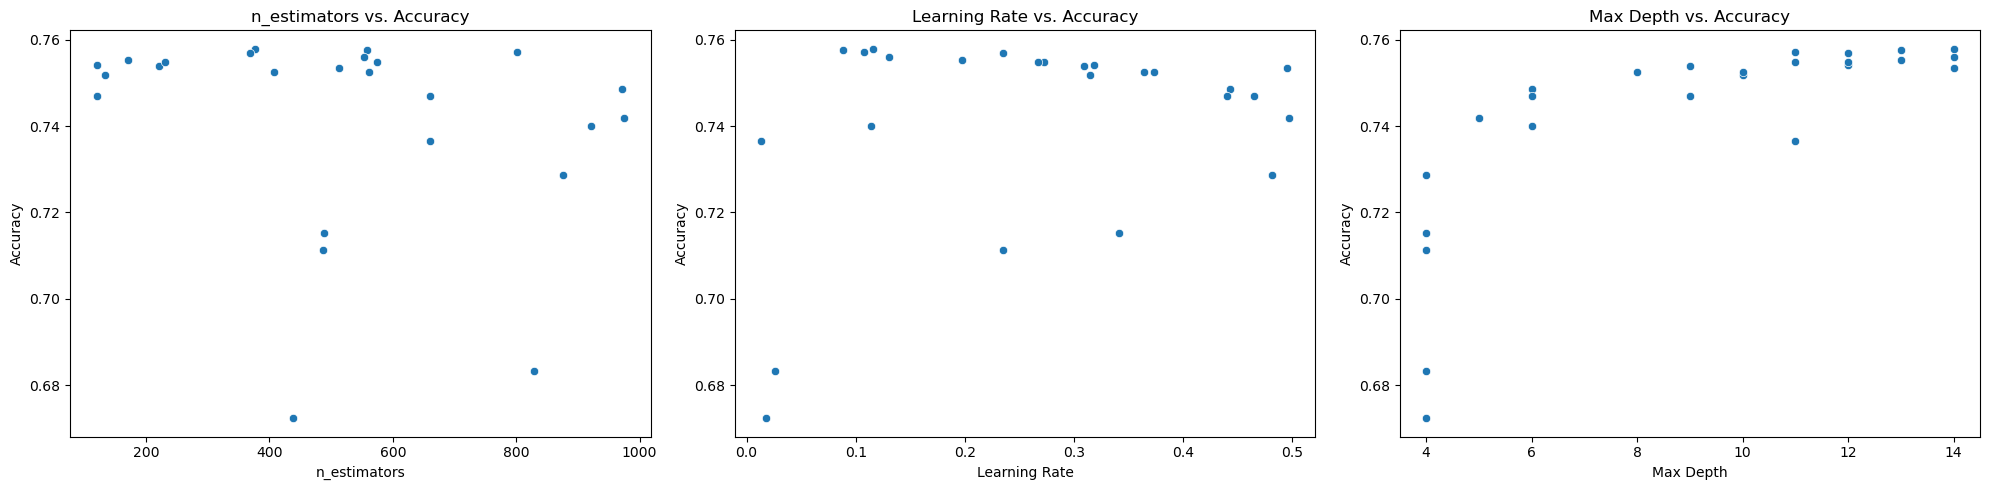

In [329]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the RandomizedSearchCV results to a pandas DataFrame
results = pd.DataFrame(random_search.cv_results_)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# n_estimators vs. accuracy
sns.scatterplot(data=results, x='param_n_estimators', y='mean_test_score', ax=axs[0])
axs[0].set_title('n_estimators vs. Accuracy')
axs[0].set_xlabel('n_estimators')
axs[0].set_ylabel('Accuracy')

# learning_rate vs. accuracy
sns.scatterplot(data=results, x='param_learning_rate', y='mean_test_score', ax=axs[1])
axs[1].set_title('Learning Rate vs. Accuracy')
axs[1].set_xlabel('Learning Rate')
axs[1].set_ylabel('Accuracy')

# max_depth vs. accuracy
sns.scatterplot(data=results, x='param_max_depth', y='mean_test_score', ax=axs[2])
axs[2].set_title('Max Depth vs. Accuracy')
axs[2].set_xlabel('Max Depth')
axs[2].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

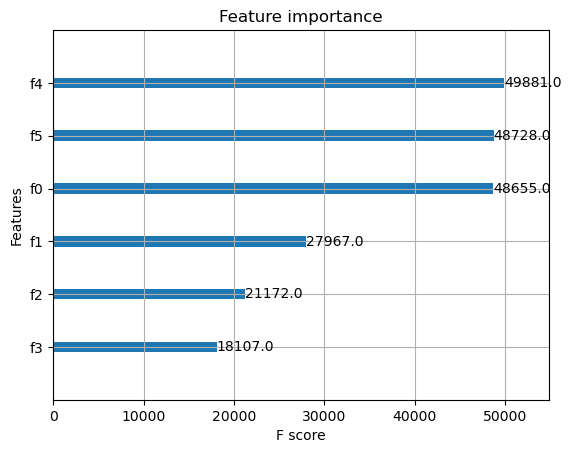

In [330]:
import matplotlib.pyplot as plt
xgb.plot_importance(best_tree_model)
plt.show()